# Trabajo grupal 8
## Grupo 1
## Miembros: 
 20163197, Enrique Alfonso Pazos 
 
 20191894, Ilenia Ttito
 
 20151595, Rodrigo Ramos
 
 20193469, Luis Eguzquiza 
 
 20163377, Jean Niño de Guzmán


In [1]:
pip install pyreadr

In [4]:
import os
import numpy as np   
import pandas as pd
from pandas import Series, DataFrame
import pyreadr

import matplotlib.pyplot as plt  # libreria de gráficos 
import seaborn as sns  # libreria 2 para gráficos 

import datetime as dt # manejar fechas 
import warnings
warnings.filterwarnings('ignore') # eliminar warning messages 

# Set directory
user = os.getlogin()
os.chdir(f"C:/Users/{user}/Documents/GitHub/1ECO35_2022_2/data")

In [5]:
dr = pyreadr.read_r("../data/wage2015_subsample_inference.Rdata")
df = dr['data']
df

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
rownames,,,,,,,,,,,,,,,,,,,,
10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,0.49,0.343,0.2401,3600,11,8370,18
12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,31.0,9.61,29.791,92.3521,3050,10,5070,9
15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,3.24,5.832,10.4976,6260,19,770,4
18,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25.0,6.25,15.625,39.0625,420,1,6990,12
19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.0,4.84,10.648,23.4256,2015,6,9470,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32620,14.769231,2.692546,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,0.81,0.729,0.6561,4700,16,4970,9
32624,23.076923,3.138833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,1.44,1.728,2.0736,4110,13,8680,20
32626,38.461538,3.649659,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,1.21,1.331,1.4641,1550,4,3680,6


# Pregunta 1
En gráfico muestre el histograma de frecuencias absolutas del salario y , en otro gráfico, el histograma del logaritmo del salario. Comente las diferencias y por qué.

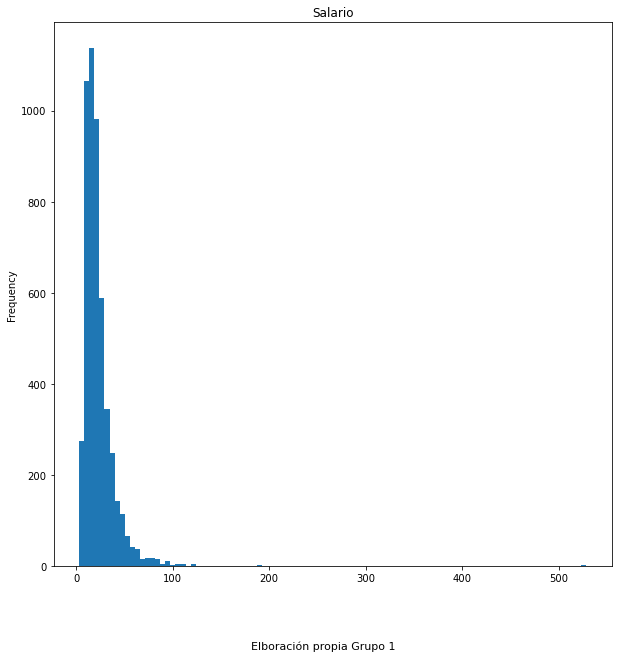

In [6]:
#PREGUNTA 1:
#Grafico1: Frecuencia del Salario
#Se indica el tamaño del gráfico
fig, ax = plt.subplots( figsize=(10,10) )
#Se indica que se use la columna "wage" para la creación de un gráfio de histograma
df['wage'].plot(kind = 'hist', bins = 100) 
#Se coloca un titulo al gráfico
plt.title('Histograma del Salario')
txt="Elboración propia Grupo 1"  
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.title('Salario')
plt.show()

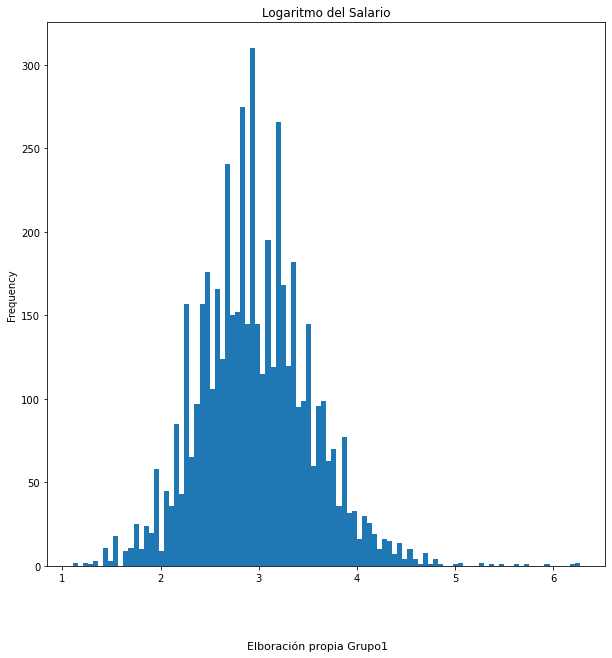

In [14]:
#Grafico2: Frecuencia del Logaritmo del Salario
#Se indica el tamaño del gráfico
fig, ax = plt.subplots( figsize=(10,10) )
df['lwage'].plot(kind = 'hist', bins = 100) 
#Se coloca un titulo al gráfico
plt.title('Logaritmo del Salario')
txt="Elboración propia Grupo1"  
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.show()

In [15]:
##COMENTARIOS:
#El primer gráfico, muestra un distribución asimétrica con la gran mayoría de datos en la parte izquierda, y muy pocos datos en la parte central y derecha.
#En el segundo gráfico, con el logaritmo del salario, se puede ver que ahora hau una distribución un poco más simétrica que en el primer caso, ya que los datos ahora se encuentran más centrados y con menor frecuencia en los laterales.
#Esta difernecia entre gráficos se va a deber a que cuando se pasa a logatirmos, generalmente para reducir las observaciones atípicas, los datos (en este caso de ingreso) van a tener magnitudes menores, por lo que estas estarán más proxias entre sí, y a su vez, para este caso, estarán formando una distribución parecida a la normal. 

# Pregunta 2
En una sola imagen, el gráfico de densidad del logaritmo del salario por hora de las mujeres que terminaron la universidad y el caso de los hombres.

Text(0.5, 0, 'lwage by sex')

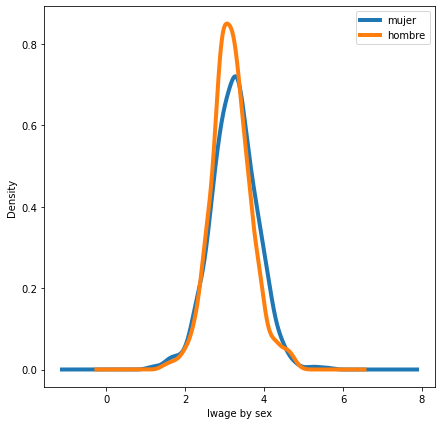

In [16]:
# filtro solo aquellas personas que terminaron la universidad y nos quedamos con las variables relevantes para las preguntas
df_univ = df[df.clg.isin([1])|df.ad.isin([1])]

df_univ = df_univ[["lwage", "sex"]]
df_h_m=pd.DataFrame()

#agregamos por mujer y hombre y renombramos las columnas
df_h_m = df_univ.pivot(columns='sex',values='lwage')
df_h_m.columns =['mujer','hombre']

import matplotlib.pyplot as plt 

#Graficamos la distribución de lwage por sexo
df_h_m.plot.density(figsize = (7, 7), linewidth = 4) 
  
plt.xlabel("lwage by sex")


# Pregunta 3
En un gráfico Pie, muestre el porcentaje de personas según nivel educativo.

In [17]:
##PREGUNTA 3
#Se seleccionan solo las columnas que tienen que ver con el nivel educativo de las personas
nivel_educ = df[['shs','hsg','scl','clg','ad']]
nivel_educ

,shs,hsg,scl,clg,ad
rownames,,,,,
10,0.0,0.0,0.0,1.0,0.0
12,0.0,0.0,0.0,1.0,0.0
15,0.0,1.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,1.0
19,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
32620,0.0,0.0,0.0,1.0,0.0
32624,0.0,0.0,1.0,0.0,0.0
32626,0.0,0.0,0.0,0.0,1.0


In [18]:
#Mediante el comando de groupby junto con count, se agruparán los registros que tengan valor de 1 en cada variable.
#Esto permitirá tener la totalidad de personas en cada nivel educativo 
base = nivel_educ.groupby([ 'shs','hsg','scl','clg','ad' ])['shs'].count()
base #Se muestra el resultado, lo cual es contiene los mismos datos que el dataframe pero ahora con los valores totalees de cada columna

shs  hsg  scl  clg  ad 
0.0  0.0  0.0  0.0  1.0     706
               1.0  0.0    1636
          1.0  0.0  0.0    1432
     1.0  0.0  0.0  0.0    1256
1.0  0.0  0.0  0.0  0.0     120
Name: shs, dtype: int64

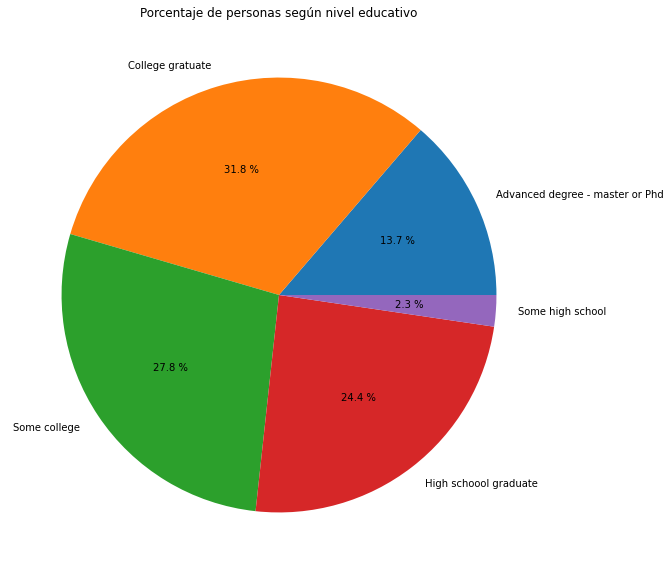

In [19]:
##Gráfico Pie:
#Se colocan las etiquetas que tendrán de acuerdo al orden del nivel educativo anteriormente establecido en la base
labels=['Advanced degree - master or Phd','College gratuate' ,'Some college','High schoool graduate','Some high school']
#Se coloca el tamaño del gráfico
plt.figure(figsize=(10,10))  
#Se indica que se cree el gráfico como un pie, que se usen los datos de la base, y que este muestre los valores en porcentajes
ax = plt.pie(base, labels=labels, autopct='%.1f %%')
#Se le coloca el titulo correspondiente
plt.title('Porcentaje de personas según nivel educativo')
#Se muestra el gráfico
plt.show()

# Pregunta 4
En un gráfico, muestre el diagrama de cajas (box - plot) del logaritmo del salario por hora de las personas con el mayor nivel educativo (ad) según genero. Nótese que el gráfico debe contener dos box-plot uno para los hombres y otro para las mujeres.

In [20]:
# Leo la base de datos en R:
rdata_read = pyreadr.read_r("../data/wage2015_subsample_inference.Rdata")
# Extraigo la información con rdata_read
data = rdata_read[ 'data' ]

# Convirtiendo en Pandas.DataFrame:
df = pd.DataFrame(data)

# variables relevantes para la pregunta 4: 
df4 = df[["lwage", "ad", "sex"]]

# Convierto las variables con .astype() a float o int según corresponda.
df4[["ad", "lwage"]].astype("float")
df4["sex"].astype("int")

rownames
10       1
12       0
15       0
18       1
19       1
        ..
32620    0
32624    1
32626    0
32631    0
32643    0
Name: sex, Length: 5150, dtype: int32

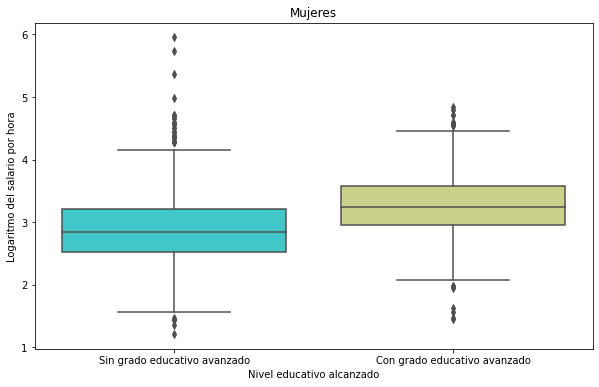

In [21]:
# Es mujer si sex = 1.

fig, ax = plt.subplots(figsize=(10,6))

box_female = sns.boxplot(x = "ad", y = "lwage", data = df4[df4['sex'] == 1 ], palette='rainbow')

# Le pongo el nombre a los ejes y también título.
plt.xlabel('Nivel educativo alcanzado')
plt.ylabel('Logaritmo del salario por hora')
plt.title("Mujeres")

# Como ad representa el grado académico avanzado, primero va ad = 0, que representa "Sin grado académico avanzado", 
# Luego , ad = 1, que representa "Con grado educativo avanzado"
box_female.set_xticklabels(["Sin grado educativo avanzado", "Con grado educativo avanzado"])

plt.show()

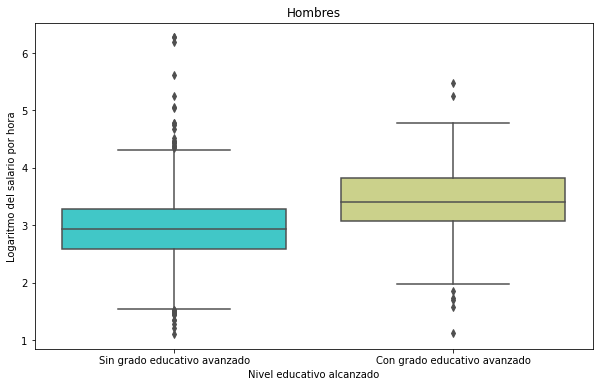

In [13]:
# Es hombre si sex = 0.
fig, ax = plt.subplots(figsize=(10,6))
box_male = sns.boxplot(x = "ad", y = "lwage", data = df4[df4['sex'] == 0 ], palette='rainbow')

# Le pongo el nombre a los ejes y también título.
plt.xlabel('Nivel educativo alcanzado')
plt.ylabel('Logaritmo del salario por hora')
plt.title("Hombres")

# Como ad representa el grado académico avanzado, primero va ad = 0, que representa "Sin grado académico avanzado", 
# Luego , ad = 1, que representa "Con grado educativo avanzado"
box_male.set_xticklabels(["Sin grado educativo avanzado", "Con grado educativo avanzado"])

plt.show()